In [1]:
import torch

In [2]:
x = torch.tensor(2.0, requires_grad = True)

In [3]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

In [4]:
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [5]:
y.backward()

In [6]:
x.grad 

tensor(93.)

93 is the slope of the polynomial at the point where x=2
at the point (2,63)

In [8]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]], requires_grad=True)

In [9]:
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [10]:
y = 3*x + 2

In [11]:
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [13]:
z = 2*y**2

In [14]:
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [15]:
# Set output to be matrix mean
out = z.mean()

In [16]:
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [17]:
out.backward()

In [18]:
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


Linear regression with PyTorch

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import torch.nn as nn

In [21]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [22]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [23]:
#create random array of error values
torch.manual_seed(71)
e = torch.randint(-8, 9, (50,1), dtype= torch.float)

In [24]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [25]:
y= 2*X + 1 + e

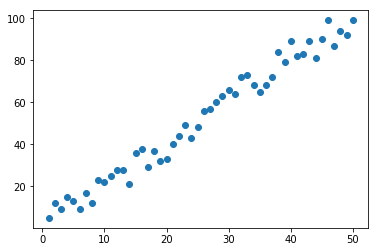

In [27]:
plt.scatter(X.numpy(),y.numpy())

In [30]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [31]:
class Model(nn.Module):
    
    def __init__(self, in_features, out_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [32]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)


Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [33]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [34]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [35]:
x1 = np.linspace(0.0,50.0,50)

In [36]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [37]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [38]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

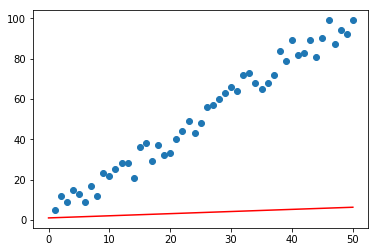

In [40]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1, 'r')

In [41]:
# in order to make this actually learn have to set loss function
criterion = nn.MSELoss()

In [42]:
#stochastic gradient desccent with a learning rate
#0.001 is a good starting place for learning rate
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [48]:
#train the model, choose number of epochs
#choose reasonable number of passes, keep track of loss
epochs = 50 
losses = []

for i in range(epochs):
    
    i = i + 1
    
    #predict on the forward pass
    y_pred = model.forward(X)
    
    #calculate our loss (error)
    loss = criterion(y_pred, y)
    
    #record that error
    losses.append(loss)
    
    print(f"epoch: {i:2}  loss: {loss.item()}  weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
   
    #prevent compounding of gradient
    optimizer.zero_grad()
          
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3057.216796875  weight: 0.10597813129425049 bias: 0.9637961387634277
epoch:  2  loss: 1588.531005859375  weight: 3.334900379180908 bias: 1.0604636669158936
epoch:  3  loss: 830.3001098632812  weight: 1.0148327350616455 bias: 0.9922627806663513
epoch:  4  loss: 438.8524169921875  weight: 2.6817996501922607 bias: 1.0425218343734741
epoch:  5  loss: 236.7615203857422  weight: 1.4840211868286133 bias: 1.0076650381088257
epoch:  6  loss: 132.4291229248047  weight: 2.3446059226989746 bias: 1.0339646339416504
epoch:  7  loss: 78.56572723388672  weight: 1.7262253761291504 bias: 1.0163217782974243
epoch:  8  loss: 50.75775909423828  weight: 2.170504093170166 bias: 1.0302516222000122
epoch:  9  loss: 36.4012336730957  weight: 1.8512457609176636 bias: 1.0214954614639282
epoch: 10  loss: 28.989227294921875  weight: 2.0806007385253906 bias: 1.029038906097412
epoch: 11  loss: 25.162382125854492  weight: 1.9157683849334717 bias: 1.0248701572418213
epoch: 12  loss: 23.186473846435547 

Text(0.5, 0, 'Epoch')

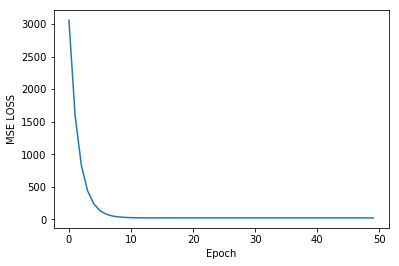

In [49]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

In [50]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

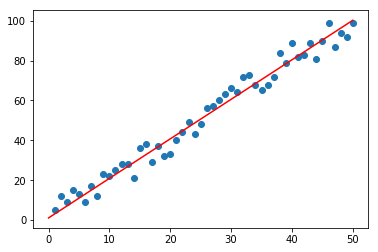

In [51]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')

Data sets with PyTorch

In [56]:
import pandas as pd
df = pd.read_csv('iris.csv') 

In [57]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [58]:
df.shape

(150, 5)

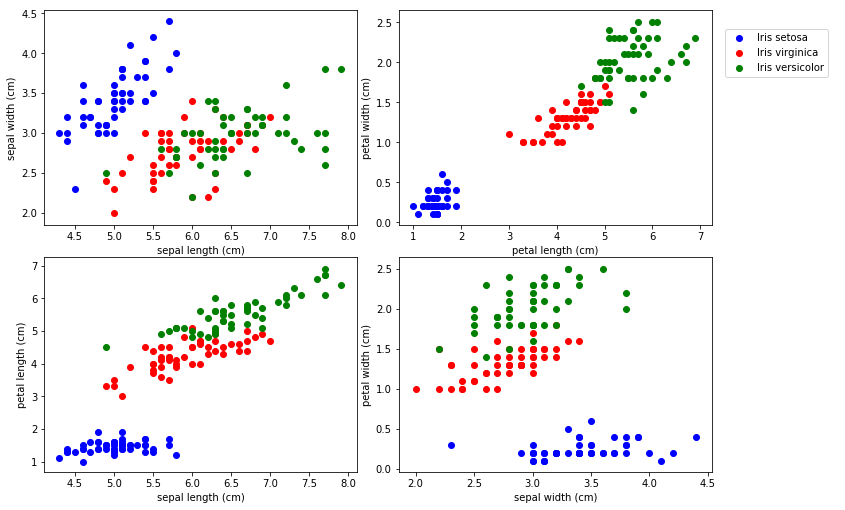

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [60]:
#train test split
from sklearn.model_selection import train_test_split

In [61]:
features  = df.drop('target', axis= 1).values
label = df['target'].values

In [65]:
#random split is like seed, arbitrary
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size= 0.2, random_state=33)

In [66]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [67]:
#reshape to match shape of X
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

Now using PyTorches built in utilities instead

In [69]:
from torch.utils.data import TensorDataset , DataLoader

In [71]:
data = df.drop('target', axis=1).values
labels = df['target'].values

In [72]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [73]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [74]:
len(iris)

150

In [76]:
for i in iris:
    print (i)
#contains the row as its own tensor and the label as a tensor

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

- now can wrap it with a data loader
- can shuffle the data and produce batches of the data

In [77]:
iris_loader = DataLoader(iris, batch_size= 50, shuffle=True)

In [78]:
for i_batch, sample_batch in enumerate(iris_loader):
    print(i_batch, sample_batch)

0 [tensor([[5.5000, 4.2000, 1.4000, 0.2000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [5.6000, 2.5000, 3.9000

- we have three batches becuase we asked for batches of 50

In [79]:
iris_loader = DataLoader(iris, batch_size= 10, shuffle=True)

In [80]:
for i_batch, sample_batch in enumerate(iris_loader):
    print(i_batch, sample_batch)

0 [tensor([[5.5000, 3.5000, 1.3000, 0.2000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.8000, 2.8000, 4.8000, 1.4000]]), tensor([0, 0, 1, 1, 2, 2, 1, 0, 2, 1])]
1 [tensor([[4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [4.8000, 3.0000, 1.4000, 0.1000]]), tensor([0, 0, 0, 0, 2, 0, 1, 1, 2, 0])]
2 [tensor([[6.9000, 3.1000, 5.1000, 2.3000],
        [5.6000, 2.7000, 

- now there are 15 batches since the batch size is 10

- We asked to shuffle the data before giving us the batches as well since we want to use it for test sets

Basic PyTorch Neural Network

- OOP object oriented programing

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
     #input layer (4 feautres of the dataset) --> hidden1 --> h2 --> output (3 classes of flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        #in_features for  input 
        #out_features for classes
        #choice of 8 and 9 are arbitrary, just be at least number of features
        #how many layers?
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    
    def forward(self,x):
        #relu is our activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

- Could easily add layers, feautres, neurons etc
- nn.Linear for fully connected layer

In [5]:
torch.manual_seed(32)
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('iris.csv')

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


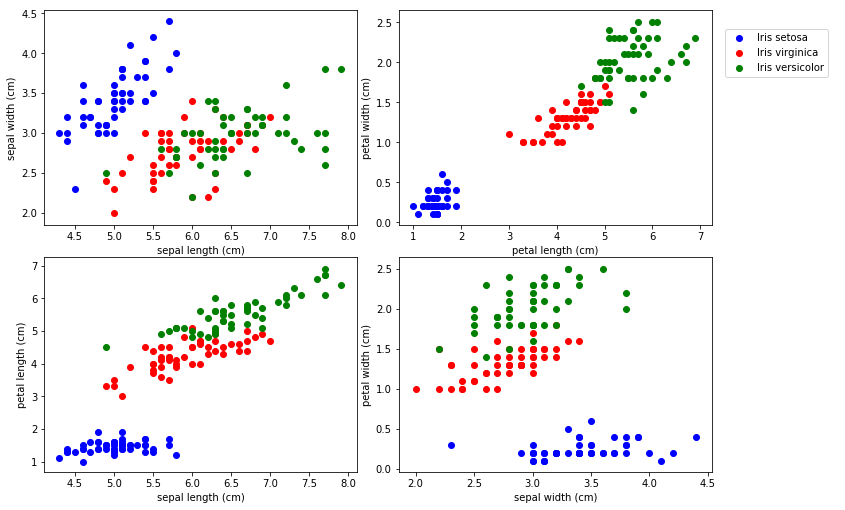

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
#encode as numpy arrays
X = X.values
y = y.values

In [13]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [42]:
#convert into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [43]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [44]:
criterion = nn.CrossEntropyLoss()
# cross entropy loss because this is a multiclass classification problem

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [45]:
model.parameters()

<generator object Module.parameters at 0x000001BB86476048>

In [46]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

- Epochs
- one run through all the training data

In [47]:
epochs = 100
losses = []

for i in range(epochs):
    
    #forward and get a prediction
    
    y_pred = model.forward(X_train)
    
    # calculate loss
    # since we used cross entropy loss we dont need to do any dummy 
    # coding between y_pred and y_train
    loss = criterion(y_pred, y_train)
    
    losses.append(loss)
    
    if i%10==0:
        print(f'epoch {i} and loss is: {loss}')
        
    # backpropagation
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 0.039181046187877655
epoch 10 and loss is: 0.041838571429252625
epoch 20 and loss is: 0.03932880237698555
epoch 30 and loss is: 0.03776932880282402
epoch 40 and loss is: 0.03668324276804924
epoch 50 and loss is: 0.03601238504052162
epoch 60 and loss is: 0.03559203818440437
epoch 70 and loss is: 0.035183172672986984
epoch 80 and loss is: 0.034746333956718445
epoch 90 and loss is: 0.034349724650382996


Text(0.5, 0, 'Epoch')

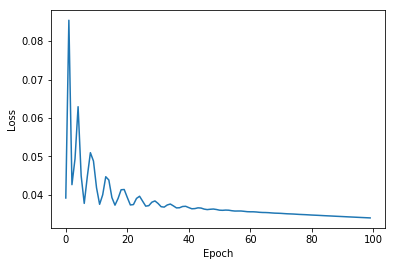

In [49]:
# check is 100 epochs was enough
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

#I reran the cells to many times to match so the graph shouldnt look
#like this see notebook 

In [39]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [40]:
loss

tensor(0.0435)

In [52]:
correct = 0

with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val)} {y_test[i]}')
        #{y_test[i]} prints the actual class 
        #greatest value is at index value of what the model thinks the
        # index should be
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1
            
print(f'We got {correct} correct!')

1.) tensor([ 16.0299,   2.3410, -14.5229]) 0
2.) tensor([ 16.2971,   2.2587, -14.5874]) 0
3.) tensor([ 14.8038,   2.0580, -13.2948]) 0
4.) tensor([-29.4857,   2.7985,   9.5791]) 2
5.) tensor([-9.3682,  7.2610, -3.1804]) 1
6.) tensor([-9.5759,  7.0866, -2.8535]) 1
7.) tensor([-25.5997,   4.4060,   6.5588]) 2
8.) tensor([-32.3969,   2.7153,  10.8944]) 2
9.) tensor([-11.7906,   7.7548,  -2.4703]) 1
10.) tensor([-35.2356,   3.5882,  11.3752]) 2
11.) tensor([ 15.0833,   1.8539, -13.1957]) 0
12.) tensor([-31.1173,   3.2657,   9.8926]) 2
13.) tensor([-5.9378,  6.3473, -4.1583]) 1
14.) tensor([-12.0155,   7.1565,  -1.7499]) 1
15.) tensor([ 14.3447,   1.9904, -12.8892]) 0
16.) tensor([-12.2055,   7.5994,  -2.1051]) 1
17.) tensor([ 18.4889,   2.0606, -15.7889]) 0
18.) tensor([ 15.4006,   2.0835, -13.7341]) 0
19.) tensor([ 14.2400,   2.3716, -13.3565]) 0
20.) tensor([-22.8274,   5.4279,   4.5189]) 1
21.) tensor([-22.9292,   5.4670,   4.4864]) 2
22.) tensor([ 15.6797,   1.7723, -13.4834]) 0
23.) t

In [53]:
# alternative to the above
#change in print line

correct = 0

with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val.argmax().item())} {y_test[i]}')
        #{y_test[i]} prints the actual class 
        #greatest value is at index value of what the model thinks the
        # index should be
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1
            
print(f'We got {correct} correct!')

1.) 0 0
2.) 0 0
3.) 0 0
4.) 2 2
5.) 1 1
6.) 1 1
7.) 2 2
8.) 2 2
9.) 1 1
10.) 2 2
11.) 0 0
12.) 2 2
13.) 1 1
14.) 1 1
15.) 0 0
16.) 1 1
17.) 0 0
18.) 0 0
19.) 0 0
20.) 1 1
21.) 1 2
22.) 0 0
23.) 0 0
24.) 0 0
25.) 2 2
26.) 2 2
27.) 2 1
28.) 2 2
29.) 0 0
30.) 1 1
We got 28 correct!


In [54]:
#save the model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [62]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))
#pass in the name of that model to use the weights and biases from that model
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [63]:
# how to use model on new unseen data
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

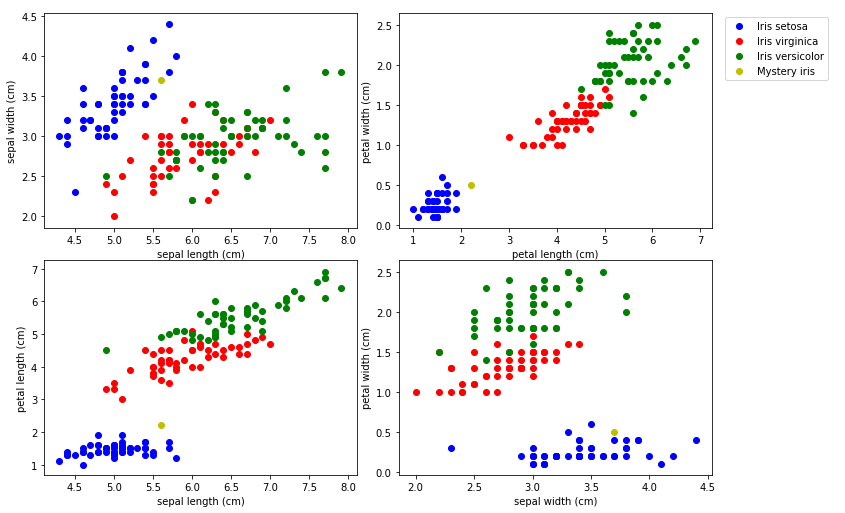

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

We would expect it to be iris setosa

In [66]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([ 13.0824,   2.9620, -13.3870])
tensor(0)


The index of the highest value is the class
or the second print line will just print the index position